In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt
from graphviz import Source as src

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn import tree

In [2]:
# Read CSV file: https://www.kaggle.com/datasets/alanjo/ssd-and-hdd-benchmarks
csv_data = pd.read_csv("SSD_HDD_benchmarks_v9.csv")

# The columns we re interested in
interested_cols = ["type","diskCapacity","diskMark","price","driveValue"]

# Create dataset with the columns
dataset = csv_data[interested_cols]

# Remove empty columns
for col in interested_cols:
    dataset = dataset[dataset[col].notna()]

# reset index cause we removed columns
dataset.reset_index(inplace=True, drop=True)

# Change "gen" from string to numeric method
def change_type_data(x):
    if x=="SSD":
        return 1
    elif x=="HDD":
        return 0
# apply method
dataset.loc[:,"type"] = dataset.loc[:,"type"].apply(change_type_data)

dataset.head()

,type,diskCapacity,diskMark,price,driveValue
0,1,953.9,48300,209.00,231.10
1,1,1800.0,47600,319.99,148.75
2,1,931.5,41833,179.99,232.42
3,1,1800.0,41506,329.99,125.78
4,1,1800.0,40602,419.99,96.67


In [3]:
dataset.tail()

,type,diskCapacity,diskMark,price,driveValue
2074,0,12.8,124,69.95,1.77
2075,0,9.8,120,63.96,1.88
2076,0,37.3,116,16.00,7.25
2077,0,41.2,112,23.99,4.67
2078,0,27.9,94,68.06,1.38


In [4]:
dataset

,type,diskCapacity,diskMark,price,driveValue
0,1,953.9,48300,209.00,231.10
1,1,1800.0,47600,319.99,148.75
2,1,931.5,41833,179.99,232.42
3,1,1800.0,41506,329.99,125.78
4,1,1800.0,40602,419.99,96.67
...,...,...,...,...,...
2074,0,12.8,124,69.95,1.77
2075,0,9.8,120,63.96,1.88
2076,0,37.3,116,16.00,7.25
2077,0,41.2,112,23.99,4.67


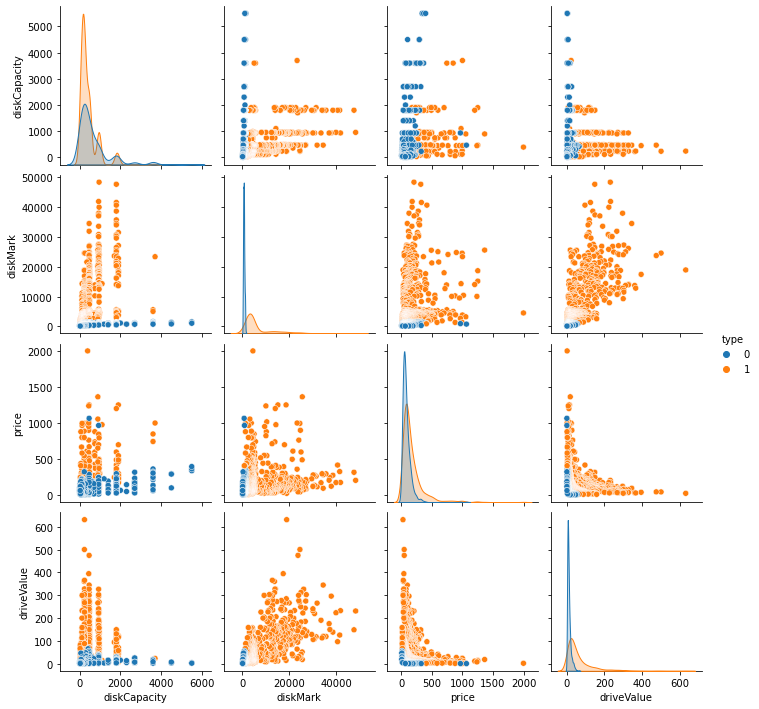

In [5]:
# pair plot to check the data to ensure something did not go missing....
sb.pairplot(dataset,hue="type")
plt.show()

In [6]:
# x contains eveything but gen
x_data = dataset.iloc[:,1:]
# y contains gen only
y_data = dataset.iloc[:,0]

# randomize x and y test and train data
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=58)


print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

      diskCapacity  diskMark   price  driveValue
1512         465.8       655  132.50        4.95
1726         298.1       500   58.98        8.48
110         1900.0     17949  699.99       25.64
1334         233.7       835   50.64       16.49
1288        1400.0       901  198.90        4.53
...            ...       ...     ...         ...
628          238.5      3542  209.99       16.87
1254        1800.0       955   58.96       16.20
1114         111.8      1334   39.99       33.36
1945         149.0       336   22.99       14.62
1955          74.5       330   99.39        3.32

[1559 rows x 4 columns]

      diskCapacity  diskMark   price  driveValue
1166        1800.0      1155   39.00       29.62
607          238.5      3664  159.99       22.90
113          931.5     17646  174.99      100.84
632          447.1      3524   56.99       61.84
571          465.8      3747   72.50       51.68
...            ...       ...     ...         ...
1804         149.0       447   42.00       

In [7]:
# generate a KNeighborsClassifier model and train it with train data
knn_model = KNeighborsClassifier(n_neighbors = 27)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [8]:
# predict y with x_test data
y_predict = knn_model.predict(x_test)

In [9]:
# print accuracy
print(accuracy_score(y_test,y_predict))


0.9942307692307693


In [10]:
# confusion matrix
confusion_matrix(y_test,y_predict,labels = [0,1])

array([[217,   2],
       [  1, 300]], dtype=int64)

In [ ]:
# loop to find best match of random_state and n_neighbors
max_accuracy = 0
temp = ""

for rand in range(0,1):
    x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=rand)

    for n in range(1,51,2):
        knn_model = KNeighborsClassifier(n_neighbors = n)
        knn_model.fit(x_train,y_train)
        y_predict = knn_model.predict(x_test)
        accuracy = accuracy_score(y_test,y_predict)
        if(max_accuracy < accuracy):
            max_accuracy = accuracy
            temp = "When rand: :", rand," n: ",n, " acc: ", accuracy
        print("When rand: :", rand," n: ",n, " acc: ", accuracy)
    
print()
print()
print(temp)

In [11]:
# randomize x and y test and train data
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=39)


print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

      diskCapacity  diskMark   price  driveValue
118          476.9     17431  173.08      100.71
1252         465.8       959   33.95       28.23
1103          97.6      1400   74.99       18.67
556          931.5      3801   79.99       47.52
1231        1800.0       998  239.99        4.16
...            ...       ...     ...         ...
927          119.2      2537  104.99       24.16
587          119.2      3693  205.00       18.02
388          465.8      4382   74.00       59.22
1088         119.2      1570  249.00        6.31
105         1900.0     18218  304.99       59.73

[1559 rows x 4 columns]

      diskCapacity  diskMark   price  driveValue
1842         465.8       411   95.40        4.31
321          465.8      4849   67.00       72.37
553          447.1      3808  999.99        3.81
2040          55.9       196   26.35        7.44
302         1800.0      5190  219.99       23.59
...            ...       ...     ...         ...
421          111.8      4251  218.93       

In [12]:
# generate a DecisionTreeClassifier model and train it with train data
dt = DecisionTreeClassifier(max_depth = 6, random_state = 39)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=39)

In [13]:
# predict y with x_test data
y_pred = dt.predict(x_test)

In [14]:
# print accuracy
accuracy_score(y_test, y_pred)

0.9961538461538462

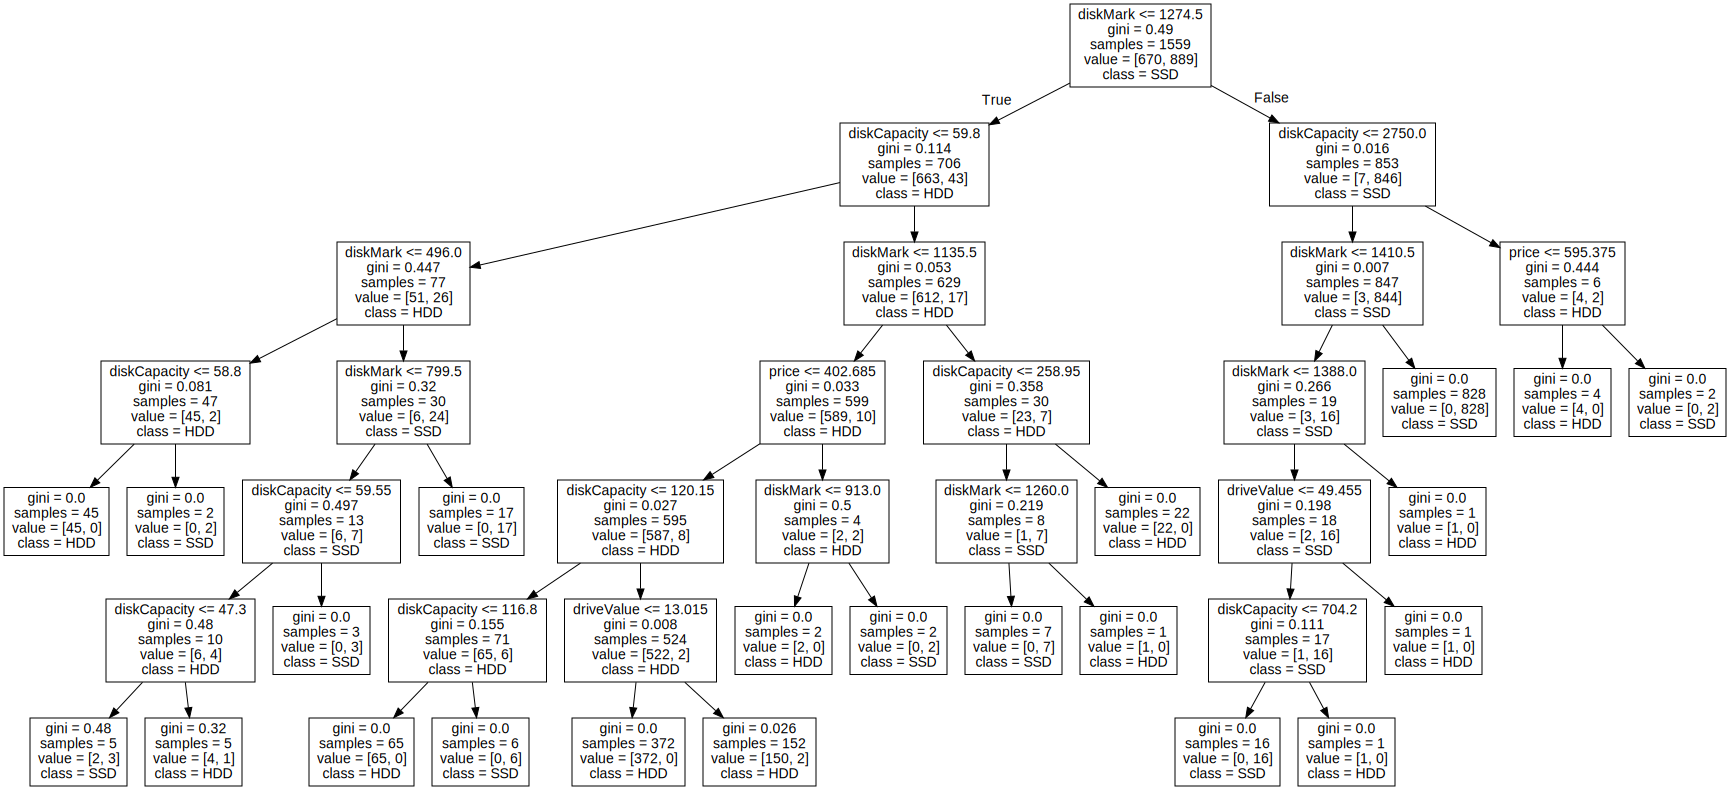

In [15]:
# Draw out the decission tree
src(tree.export_graphviz(dt, out_file=None, class_names=["HDD", "SSD"], feature_names= x_train.columns)) # display the tree, with no output file

In [ ]:
max_accuracy = 0
temp = ""

for rand in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=rand)

    for n in range(1,30):
        dt = DecisionTreeClassifier(max_depth = n, random_state = rand)
        dt.fit(x_train, y_train)
        y_pred = dt.predict(x_test)
        accuracy = accuracy_score(y_test,y_pred)
        if(max_accuracy < accuracy):
            max_accuracy = accuracy
            temp = "When rand: :", rand," n: ",n, " acc: ", accuracy
        print("When rand: :", rand," n: ",n, " acc: ", accuracy)
    
print()
print()
print(temp)